In [39]:
from initialization import Location
from initialization import Grid
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Base Model

In [40]:

# Parameters
beta = 0.3 
mu = 0.1  
population = 1000 
initial_infected = 1  
initial_susceptible = population - initial_infected  
initial_recovered = 0 
days = 100  

# Create arrays to store the results
susceptible = np.zeros(days)
infectious = np.zeros(days)
recovered = np.zeros(days)

# Initialize the initial conditions
susceptible[0] = initial_susceptible
infectious[0] = initial_infected
recovered[0] = initial_recovered

# Simulate the SIR model
for day in range(1, days):
    new_infections = beta * susceptible[day - 1] * infectious[day - 1] / population
    new_recoveries = mu * infectious[day - 1]

    susceptible[day] = susceptible[day - 1] - new_infections
    infectious[day] = infectious[day - 1] + new_infections - new_recoveries
    recovered[day] = recovered[day - 1] + new_recoveries



# Mobility-Based Model

In [41]:

def get_other_loc_params(grid,loc):
    infections = 0
    total_connections = 0
    for j in loc.connections:
        if grid.map[j].n != 0:
            infections += loc.connections[j] * (grid.map[j].i / grid.map[j].n)
            total_connections += loc.connections[j]
    
    return infections, total_connections

### Random Origin w/ Dynamic Alpha

In [42]:
def dynamic_alpha():
    # Parameters
    beta = 0.3 #rate of infection *CHANGE LATER MAYBE*
    mu = 0.1 #rate of recovery *CHANGE LATER MAYBE*
    N = 1000 
    n_locations=10
    days = 100
    alphas = np.arange(0.1,1.1,0.1)
    alpha=0.5
    trials=10

    alpha_sir = {}
    for alpha in alphas:

        # Create arrays to store the results
        susceptible = np.zeros(days)
        infectious = np.zeros(days)
        recovered = np.zeros(days) 
        for trial in range(trials):
    
            #Initialize grid and locations
            grid = Grid(n_locations, N, alpha, beta, mu)

            #initialize random starting location
            grid.random_orgin()

            for day in range(days):
                for loc in grid.map:
                    if loc.n != 0:
                        infections, total_connections = get_other_loc_params(grid, loc)
                        
                        new_infections = (beta * loc.s * loc.i/ loc.n) + ((alpha*loc.s*infections*beta)/(loc.n+total_connections))
                        
                        new_recoveries = (mu * loc.i) / loc.n

                        loc.s = loc.s - new_infections
                        loc.i = loc.i + new_infections - new_recoveries
                        loc.r = loc.r + new_recoveries

                        susceptible[day] += loc.s
                        infectious[day] += loc.i
                        recovered[day] += loc.r

        susceptible = [day / (trials*N) for day in susceptible]
        infectious = [day / (trials*N) for day in infectious]
        recovered = [day / (trials*N) for day in recovered]

        susceptible.insert(0,1)
        infectious.insert(0,1/N)
        recovered.insert(0,0)

        alpha_sir[alpha] = [susceptible, infectious, recovered]
    return alpha_sir

In [43]:
dynamic_alpha_results = dynamic_alpha()
dynamic_alpha_results

{0.1: [[1,
   0.99869200694227,
   0.9982918945388805,
   0.9977734717748732,
   0.9971039396852821,
   0.9962427140410904,
   0.9951403103509252,
   0.9937374583935829,
   0.9919646694885396,
   0.9897425171060171,
   0.9869828866602304,
   0.9835913769946306,
   0.9794708649458814,
   0.9745259420418968,
   0.9686674829720563,
   0.9618160945147307,
   0.9539029268690947,
   0.9448668033824619,
   0.9346481281267225,
   0.9231820294734756,
   0.9103942717175875,
   0.8962024545531442,
   0.8805225414938601,
   0.8632790351855443,
   0.8444175764687799,
   0.8239200656733239,
   0.8018218370719356,
   0.7782272167317604,
   0.7533165845383168,
   0.727338222821596,
   0.7005825648921458,
   0.6733430599827948,
   0.645874158985908,
   0.6183601830808001,
   0.5909062841379575,
   0.5635542126546549,
   0.536315992573473,
   0.5092138349283915,
   0.4823156702113336,
   0.4557588111931552,
   0.42975669868764155,
   0.40458599154184116,
   0.3805548409486738,
   0.35795819840693105,
  

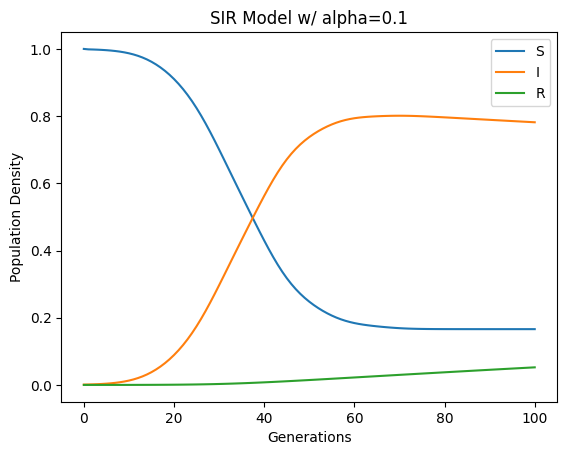

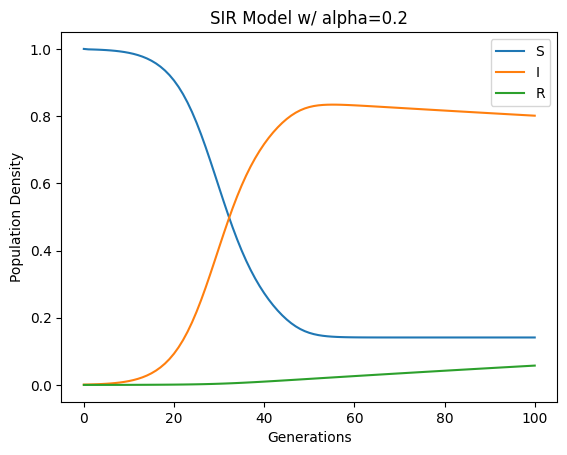

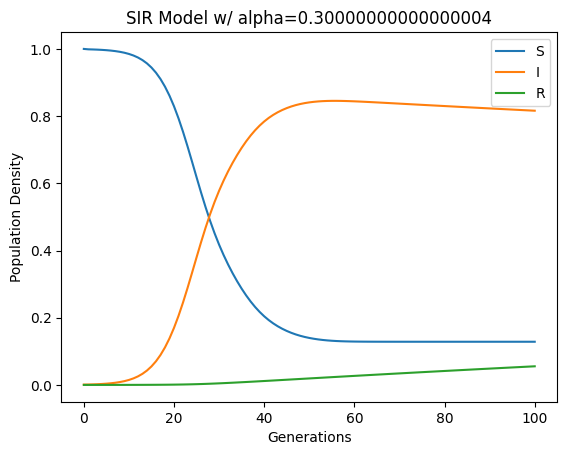

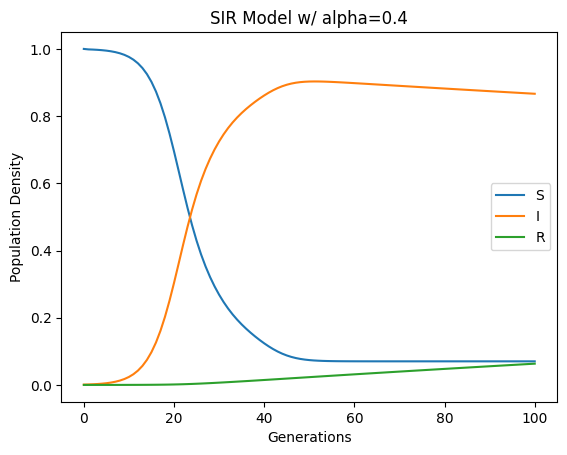

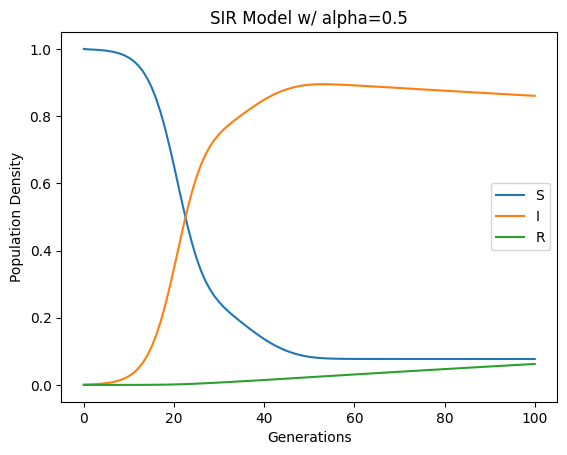

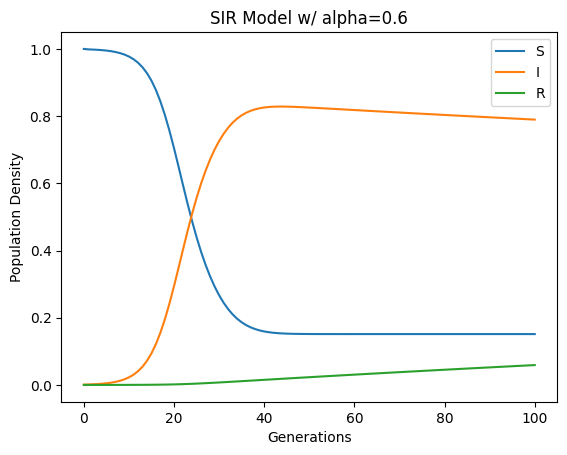

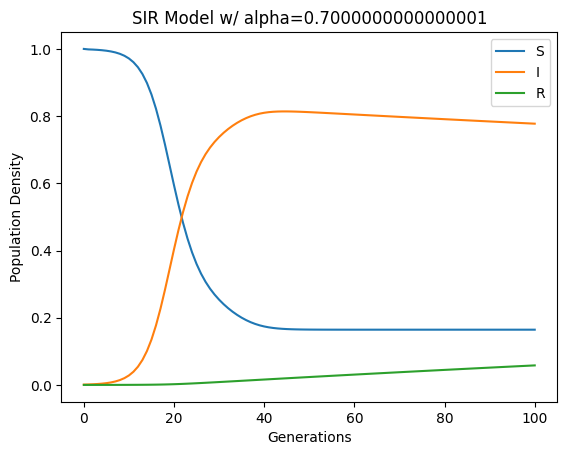

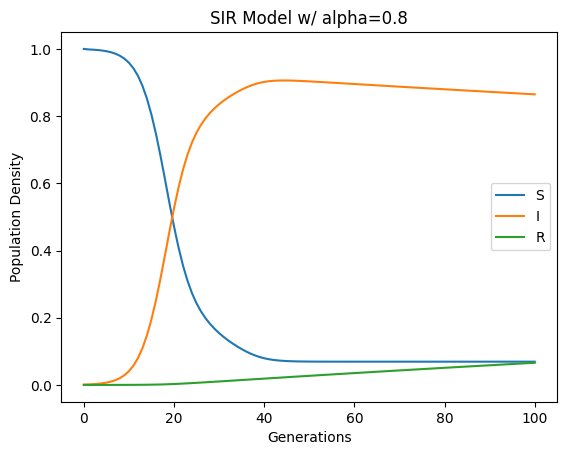

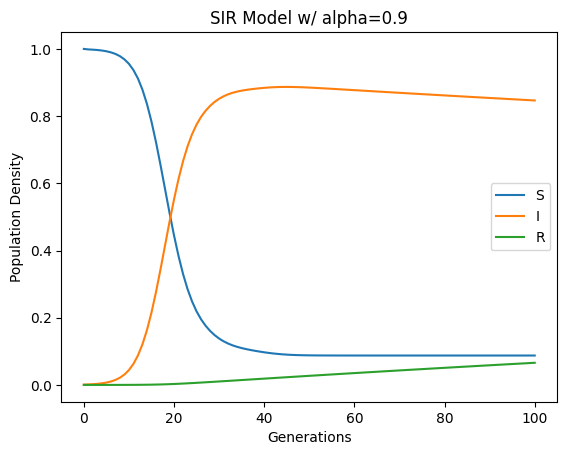

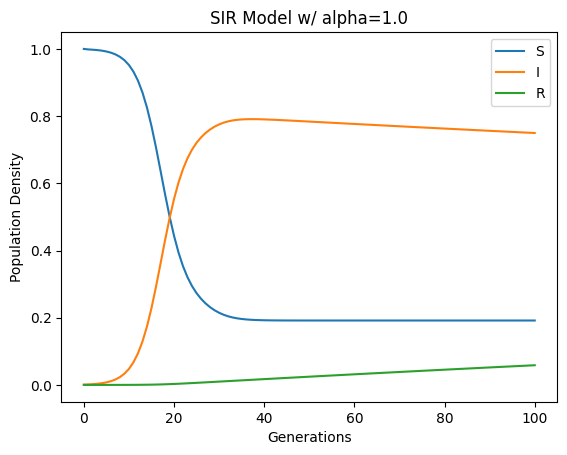

In [44]:
translation = {0:"S", 1:"I", 2:"R"}
for key, values in dynamic_alpha_results.items():
    plt.figure()
    for sublist in values:
        # plt.plot(sublist, label=f'{key}_{values.index(sublist)}')
        plt.plot(sublist, label=translation[values.index(sublist)])
        plt.title(f'SIR Model w/ alpha={key}')

    plt.legend()
    plt.xlabel("Generations")
    plt.ylabel("Population Density")
    
plt.show()

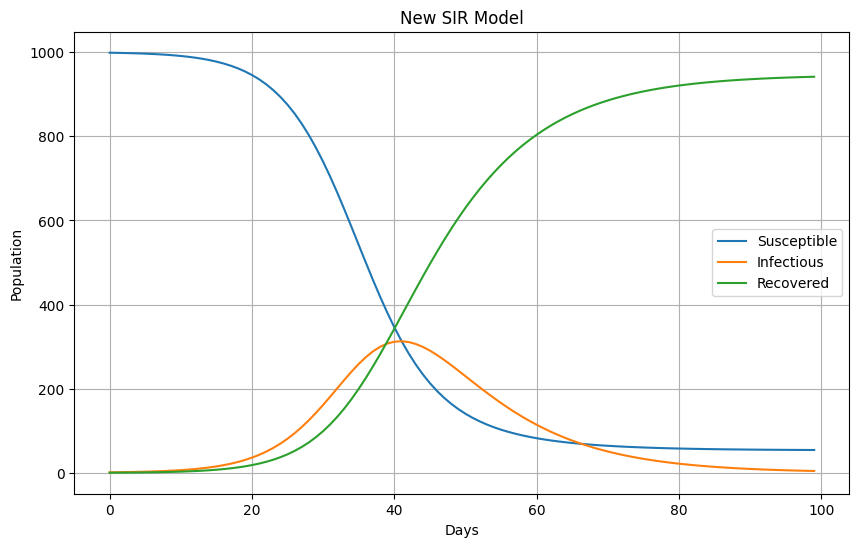

In [45]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(susceptible, label="Susceptible")
plt.plot(infectious, label="Infectious")
plt.plot(recovered, label="Recovered")
plt.xlabel("Days")
plt.ylabel("Population")
plt.legend()
plt.title("New SIR Model")
plt.grid(True)
plt.show()

### High Mobility w/ Dynamic Alpha

In [46]:
def high_mobility_dynamic_alpha():
    # Parameters
    beta = 0.3 #rate of infection *CHANGE LATER MAYBE*
    mu = 0.1 #rate of recovery *CHANGE LATER MAYBE*
    N = 1000 
    n_locations=10
    days = 100
    alphas = np.arange(0.1,1.1,0.1)
    alpha=0.5
    trials=10
    threshold = 0.1
    highly = True

    alpha_sir = {}
    for alpha in alphas:

        # Create arrays to store the results
        susceptible = np.zeros(days)
        infectious = np.zeros(days)
        recovered = np.zeros(days) 
        for trial in range(trials):
    
            #Initialize grid and locations
            grid = Grid(n_locations, N, alpha, beta, mu)

            #initialize random starting location
            grid.mobility_based_origin(threshold, highly)

            for day in range(days):
                for loc in grid.map:
                    if loc.n != 0:
                        infections, total_connections = get_other_loc_params(grid, loc)
                        
                        new_infections = (beta * loc.s * loc.i/ loc.n) + ((alpha*loc.s*infections*beta)/(loc.n+total_connections))
                        
                        new_recoveries = (mu * loc.i) / loc.n

                        loc.s = loc.s - new_infections
                        loc.i = loc.i + new_infections - new_recoveries
                        loc.r = loc.r + new_recoveries

                        susceptible[day] += loc.s
                        infectious[day] += loc.i
                        recovered[day] += loc.r

        susceptible = [day / (trials*N) for day in susceptible]
        infectious = [day / (trials*N) for day in infectious]
        recovered = [day / (trials*N) for day in recovered]

        susceptible.insert(0,1)
        infectious.insert(0,1/N)
        recovered.insert(0,0)

        alpha_sir[alpha] = [susceptible, infectious, recovered]
    return alpha_sir

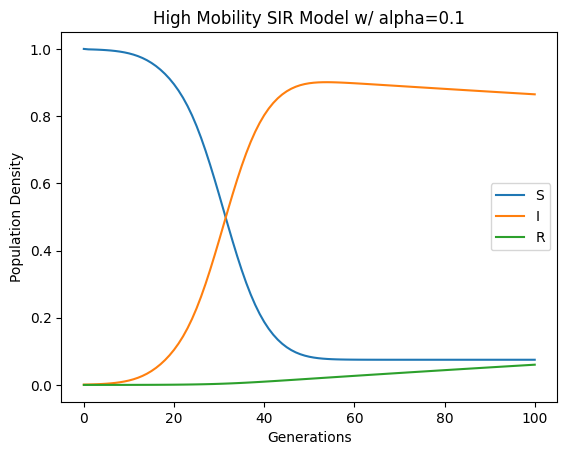

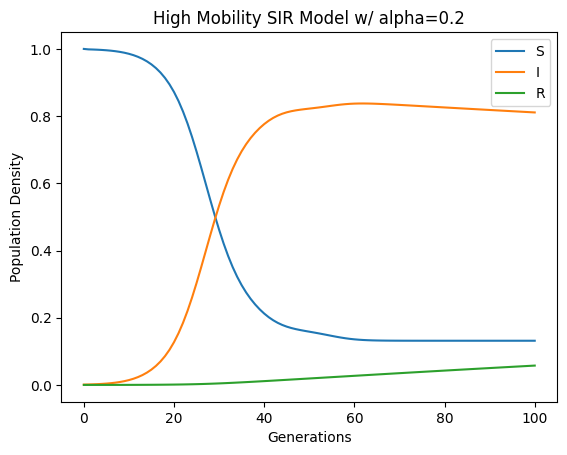

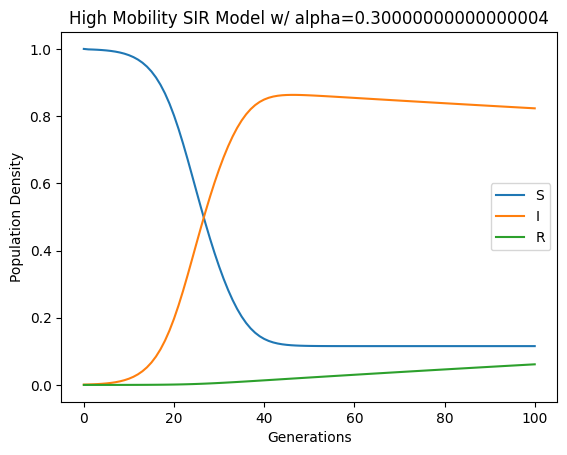

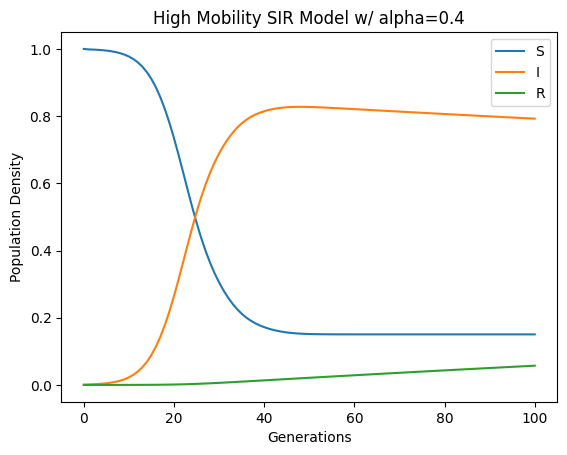

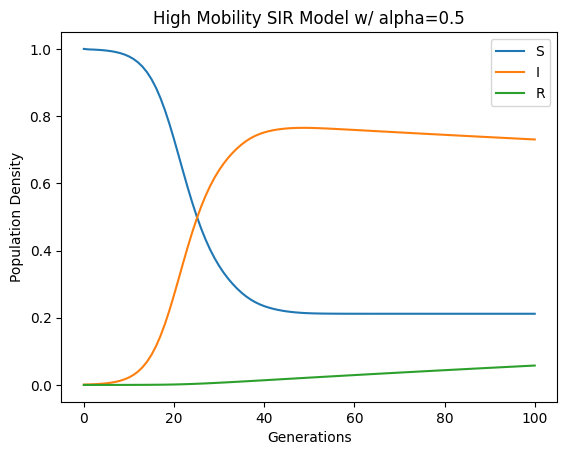

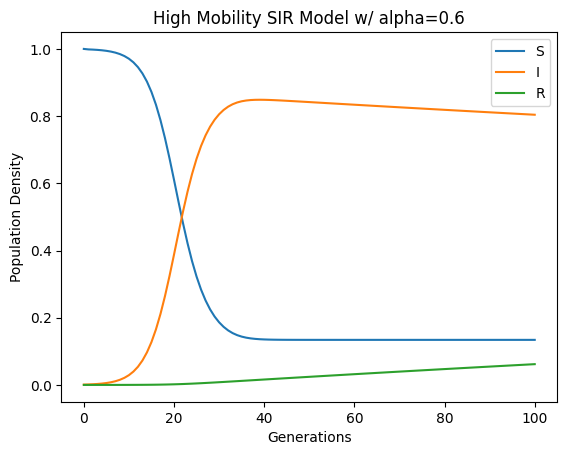

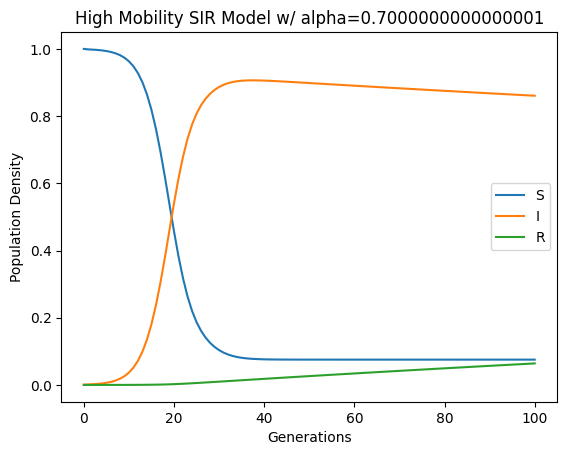

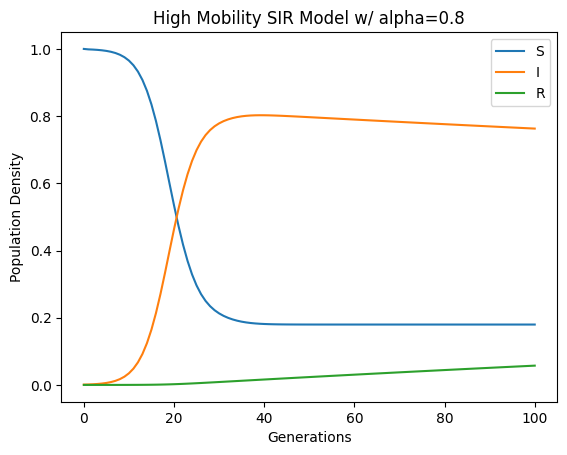

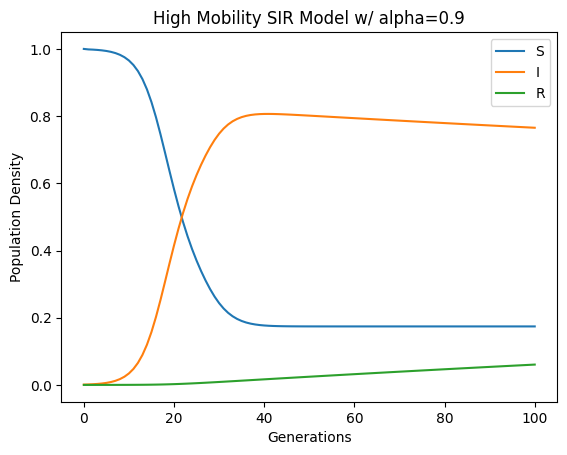

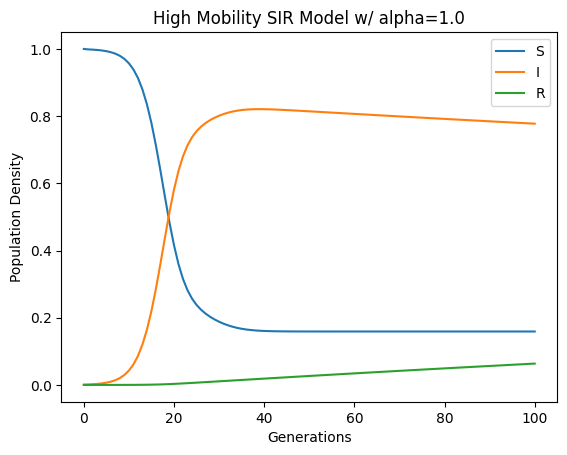

In [49]:
high_mobility_results = high_mobility_dynamic_alpha()
translation = {0:"S", 1:"I", 2:"R"}
for key, values in high_mobility_results.items():
    plt.figure()
    for sublist in values:
        plt.plot(sublist, label=translation[values.index(sublist)])
        plt.title(f'High Mobility SIR Model w/ alpha={key}')

    plt.legend()
    plt.xlabel("Generations")
    plt.ylabel("Population Density")
    
plt.show()